<a href="https://colab.research.google.com/github/anko191/Python_Kaggle/blob/master/lightgbm_xgboost/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import lightgbm as lgb
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()

In [3]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [4]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target_names[wine.target]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [7]:
X,y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train, feature_name = wine.feature_names)

lgb_eval = lgb.Dataset(X_test, y_test, reference = lgb_train)

# param
lgbm_params = {
    'objective':'multiclass',
    'num_class':3,
}

In [8]:
model = lgb.train(lgbm_params, lgb_train, valid_sets = lgb_eval)

# predict test
y_pred = model.predict(X_test, num_iteration = model.best_iteration)
y_pred_max = np.argmax(y_pred, axis = 1)

# 精度を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:{0}'.format(accuracy))

[1]	valid_0's multi_logloss: 0.982701
[2]	valid_0's multi_logloss: 0.904789
[3]	valid_0's multi_logloss: 0.835672
[4]	valid_0's multi_logloss: 0.775764
[5]	valid_0's multi_logloss: 0.717664
[6]	valid_0's multi_logloss: 0.667076
[7]	valid_0's multi_logloss: 0.624061
[8]	valid_0's multi_logloss: 0.585307
[9]	valid_0's multi_logloss: 0.551015
[10]	valid_0's multi_logloss: 0.514047
[11]	valid_0's multi_logloss: 0.479409
[12]	valid_0's multi_logloss: 0.447101
[13]	valid_0's multi_logloss: 0.418492
[14]	valid_0's multi_logloss: 0.394879
[15]	valid_0's multi_logloss: 0.371715
[16]	valid_0's multi_logloss: 0.354436
[17]	valid_0's multi_logloss: 0.334285
[18]	valid_0's multi_logloss: 0.315986
[19]	valid_0's multi_logloss: 0.298296
[20]	valid_0's multi_logloss: 0.284895
[21]	valid_0's multi_logloss: 0.270079
[22]	valid_0's multi_logloss: 0.257147
[23]	valid_0's multi_logloss: 0.246891
[24]	valid_0's multi_logloss: 0.235394
[25]	valid_0's multi_logloss: 0.224736
[26]	valid_0's multi_logloss: 0.21

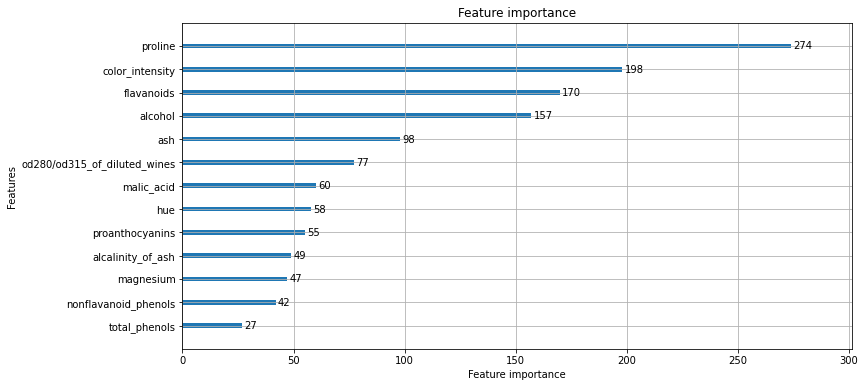

In [9]:
# 特徴量をプロット
lgb.plot_importance(model, figsize = (12, 6))
plt.show()